<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/karlguen/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HOMEWORK 3**

## Part 1: Experimental Setup with phyphox
**Task: Data Acquisition**  
1. Design an experiment using your phone's **3-axis accelerometer** (e.g., free-fall, pendulum motion, or elevator acceleration).  
2. Configure phyphox to record data at ≥100 Hz sampling rate
3. Export 1-60 seconds of raw acceleration data (`acceleration.csv`) with timestamps.  

### My Experiment Set Up:
I decided to use free-fall to test my phone's 3-axis accelerometer.
I did this by dropping my phone off of a staircase and using the Acceleration with g setting to gather my data. My phone, recording data at 100.4 Hz, recorded data for over 3 seconds.


# Part 2: Data Analysis with pandas and NumPy
**Task: Data Preprocessing**
- upload the csv to google colab
- read in csv file using `pandas`
- remove beginning and end of data where experiment didn't start yet / was already over (check part 3)


### Importing the Data




In [61]:
import pandas as pd

# This is me uploading the data to Google Colab itself and using it locally, as per the instructions above
#data = pd.read_csv('RawAccelData.csv',sep=';', index_col=0)
#data

# The below code is so that this homework's file can be used in any runtime environment

data_URI = 'https://raw.githubusercontent.com/ubsuny/PHY386/Homework2025/2025/HW/karlguen/data/RawAccelData.csv'
data = pd.read_csv(data_URI,sep=';', index_col=0)
data

,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
Time (s),,,,
0.000278,-1.637894,3.616629,7.870783,8.815437
0.010243,-1.327889,3.600463,8.029602,8.899502
0.020209,-1.121468,3.526666,8.245753,9.038114
0.030174,-1.031804,3.598517,8.591234,9.371406
0.040140,-1.717828,3.675756,8.762927,9.656656
...,...,...,...,...
3.637672,0.269589,0.536634,10.075248,10.093131
3.647638,0.310454,0.487686,10.057585,10.074187
3.657603,0.461041,0.406105,9.853859,9.872994


This code below will give us our overall Absolute Acceleration as a plot without any beginning or endings removed

<Axes: xlabel='Time (s)'>

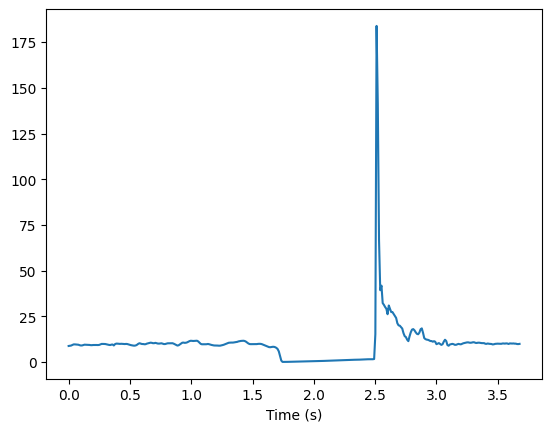

In [62]:
data['Absolute acceleration (m/s^2)'].plot()

Now, we will remove the parts where the experiment hadn't started and where the experiment ended. The experiment starts right at the beginning of the experiment, let's say 0.1 seconds and ends right before the huge jump at around 1.75 seconds. This huge jump is caused by the phone hitting the floor and having a rapid negative acceleration when it is stopped, so we must remove it.

<Axes: xlabel='Time (s)'>

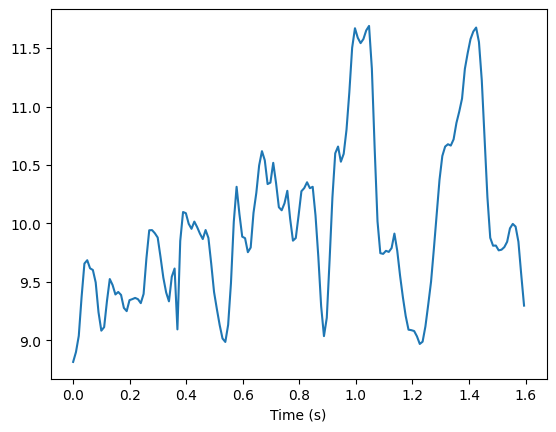

In [63]:
data['Absolute acceleration (m/s^2)'] \
 [(data['Absolute acceleration (m/s^2)'].index<1.6) & \
  (data['Absolute acceleration (m/s^2)'].index>0)].plot()

# Part 3: Model Fitting and Visualization

**Task: Plot preprocessed data using pandas**
- plot time vs acceleration

**Task: Model fit**
- use `scipy.optimize.curve_fit` to fit a physics model to your data

Fitted constant value of g: 9.975541214311482


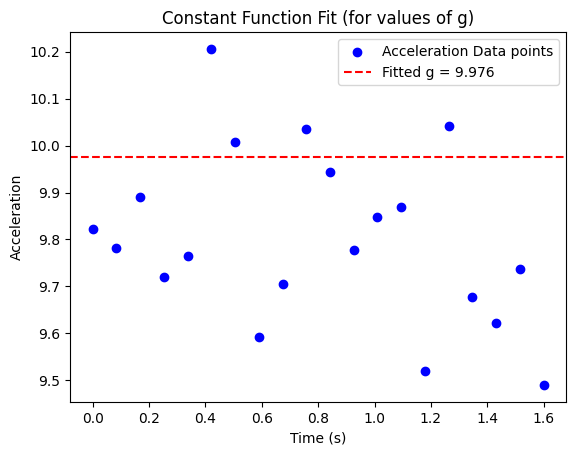

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
time = np.linspace(0, 1.6, 20)
acceleration = data['Absolute acceleration (m/s^2)'] \
 [(data['Absolute acceleration (m/s^2)'].index<1.6) & \
  (data['Absolute acceleration (m/s^2)'].index>0)]

def fit_constant_function(x, c):
    return c

params, covariance = curve_fit(fit_constant_function, time, acceleration)
fitted_g = params[0]
print(f"Fitted constant value of g: {fitted_g}")

plt.scatter(time, voltage, label="Acceleration Data points", color="blue")
plt.axhline(fitted_g, color="red", linestyle="--", label="Fitted g = {:0.3f}".format(fitted_g))
plt.xlabel("Time (s)")
plt.ylabel("Acceleration")
plt.title("Constant Function Fit (for values of g)")
plt.legend()
plt.show()

So, therefore, the given value for our data is 9.976 m/s^2

# Part 4: Advanced Visualization
**Task: Interactive Plotting**  
Create a 2x2 subplot grid containing:  
- Raw 3D acceleration vs time


Text(0.5, 0, 'Time (s)')

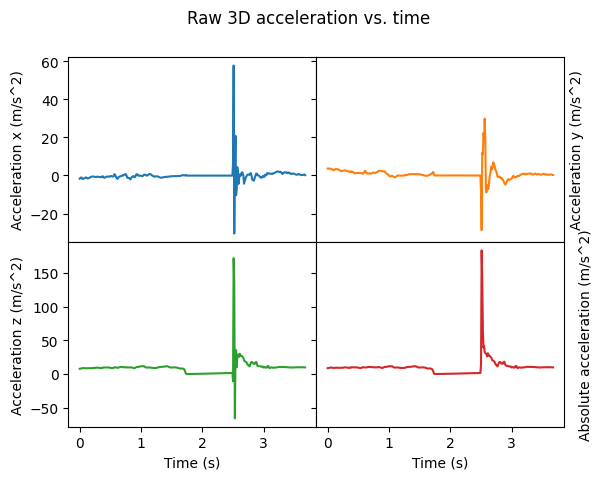

In [65]:
import matplotlib.pyplot as plt

fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Raw 3D acceleration vs. time')
ax1.plot(data.index, data['Acceleration x (m/s^2)'])
ax2.plot(data.index, data['Acceleration y (m/s^2)'], 'tab:orange')
ax3.plot(data.index, data['Acceleration z (m/s^2)'], 'tab:green')
ax4.plot(data.index, data['Absolute acceleration (m/s^2)'], 'tab:red')
ax1.set_ylabel('Acceleration x (m/s^2)')
ax3.set_xlabel('Time (s)')
ax2.yaxis.set_label_position("right")
ax2.set_ylabel("Acceleration y (m/s^2)")
ax4.yaxis.set_label_position("right")
ax4.set_ylabel('Absolute acceleration (m/s^2)', labelpad=10) # I used labelpad to add spacing, suggested by Gemini
ax3.set_ylabel('Acceleration z (m/s^2)')
ax4.set_xlabel('Time (s)')


# Part 5: Error Propagation and Reporting
**Task: Uncertainty Quantification**  
1. Calculate systematic error from phyphox sensor resolution
2. Compare experimental $g$ to local gravitational acceleration (use NOAA's geoid calculator)  
3. Discuss sources of discrepancy (sensor tilt, air resistance, etc.)

The standard deviation for my accelerometer is 0.008 m/s^2 according to the phyphox sensor resolution.

However, the local gravitational acceleration given by the NOAA is 9.80361 m/s^2. So, with my reading of 9.976 m/s^2 I had a discrepancy of 0.17239 m/s^2 or 1.76% error.

I believe the discrepancy was likely from how the experiment was performed, namely the release and catching process. There could have been significant shaking from the actions of releasing or catching the phone that would shift the overall reading for the force of gravity. This can be seen in the raw data from part 4 where at the end of the experiment there is a huge change in acceleration due to the rapid stopping of my phone. The tilt of the sensors could also have a play in this as my phone was not completely flat when it dropped.

